In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline
import seaborn as sns
sns.__version__

'0.11.2'

In [2]:
df = pd.read_csv('https://github.com/snakeway8/coffee/raw/main/simplified_coffee.csv')

In [3]:
df.head(5)

,name,roaster,roast,loc_country,origin,100g_USD,rating,review_date,review
0,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Ethiopia,4.70,92,November 2017,"Crisply sweet, cocoa-toned. Lemon blossom, roa..."
1,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Ethiopia,4.19,92,November 2017,"Delicate, sweetly spice-toned. Pink peppercorn..."
2,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Ethiopia,4.85,94,November 2017,"Deeply sweet, subtly pungent. Honey, pear, tan..."
3,Ethiopia Kayon Mountain,Red Rooster Coffee Roaster,Light,United States,Ethiopia,5.14,93,November 2017,"Delicate, richly and sweetly tart. Dried hibis..."
4,Ethiopia Gelgelu Natural Organic,Willoughby's Coffee & Tea,Medium-Light,United States,Ethiopia,3.97,93,November 2017,"High-toned, floral. Dried apricot, magnolia, a..."


In [4]:
df.isnull().sum()

name            0
roaster         0
roast          12
loc_country     0
origin          0
100g_USD        0
rating          0
review_date     0
review          0
dtype: int64

In [5]:
df.dtypes

name            object
roaster         object
roast           object
loc_country     object
origin          object
100g_USD       float64
rating           int64
review_date     object
review          object
dtype: object

In [6]:
df["review_date"] = df['review_date'].astype('datetime64')

In [7]:
colors = ['sandybrown','peachpuff','orange','lightseagreen', 'sienna', 'chocolate', 'darkorange', 'mediumaquamarine']

def pie_chart(df, col, title):
    labels = [i for i in df[col].value_counts().index]
    df[col].value_counts().plot.pie(figsize=(8,8),
                                                 pctdistance=0.4,
                                                 startangle=90,
                                                 textprops={"color": "white"},
                                                 wedgeprops={"linewidth":0}, colors = colors)
    plt.title(title, fontsize=20, pad=5)
    plt.ylabel("")
    box = plt.gca().get_position()
    plt.gca().set_position([box.x0, box.y0, box.width * 0.8, box.height])
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), prop={"size":12, 
                                                                 "weight":"ultralight"})
    

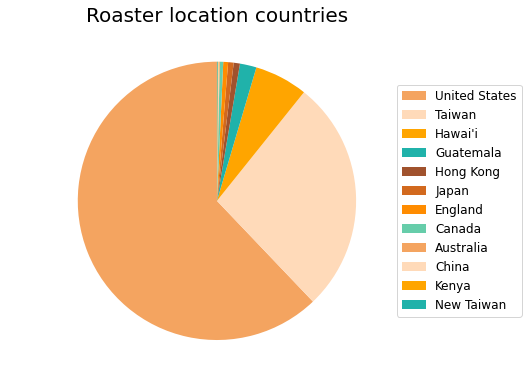

In [8]:
pie_chart(df, "loc_country", "Roaster location countries")

We can see that the majority of the roasteries covered in the dataset are based in the United States and Taiwan.

In [61]:
! pip install phik

In [62]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [63]:
phik_overview=df[['rating','loc_country', 'origin', '100g_USD','review_date']].phik_matrix()

interval columns not set, guessing: ['rating', '100g_USD']


In [64]:
phik_overview

,rating,loc_country,origin,100g_USD,review_date
rating,1.000000,0.399348,0.343912,0.339141,0.245747
loc_country,0.399348,1.000000,0.666795,0.679724,0.566413
origin,0.343912,0.666795,1.000000,0.669658,0.695709
100g_USD,0.339141,0.679724,0.669658,1.000000,0.190711
review_date,0.245747,0.566413,0.695709,0.190711,1.000000


<AxesSubplot:>

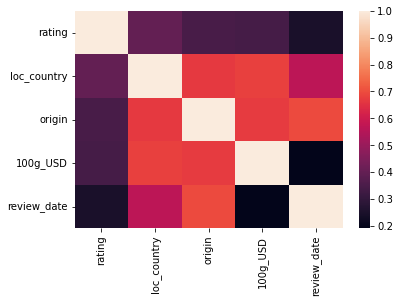

In [65]:
sns.heatmap(phik_overview)

We can see the most correlation between origin and 100g_USD and between review_date and origin. Also we can see small correlation between 100g_USD and rating. 

Let's see how the main origins change depending on the year.

In [52]:
df_2021 = df[df['review_date'].between('2021-01-01', '2021-12-31')]

In [ ]:
df_2022 = df[df['review_date'].between('2022-01-01', '2022-12-31')]

Text(0.5, 1.0, 'Origins 2022')

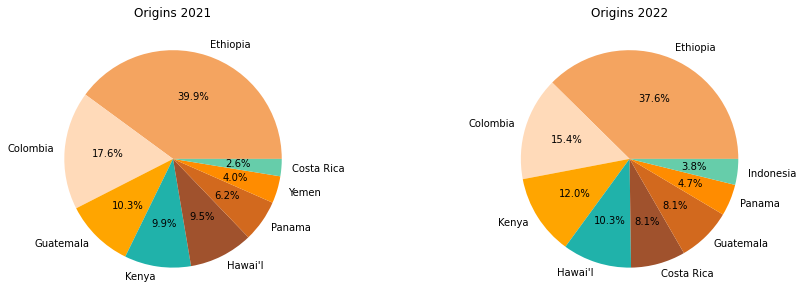

In [60]:


# first plot
top8_2021 = df_2021['origin'].value_counts().head(8)
labels_2021 = top8_2021.index
counts_2021 = top8_2021.values
colors = ['sandybrown','peachpuff','orange','lightseagreen', 'sienna', 'chocolate', 'darkorange', 'mediumaquamarine']
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].pie(counts_2021, labels=labels_2021, colors=colors,
           autopct='%1.1f%%')
axs[0].set_title("Origins 2021")

# second plot
top8_2022 = df_2022['origin'].value_counts().head(8)
labels_2022 = top8_2022.index
counts_2022 = top8_2022.values
axs[1].pie(counts_2022, labels=labels_2022, colors=colors,
           autopct='%1.1f%%')
axs[1].set_title("Origins 2022")



Let's see how the main origins change depending on the price('100g_USD').

<AxesSubplot:xlabel='origin'>

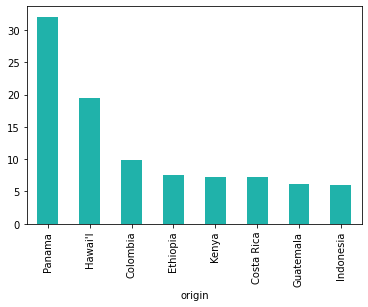

In [66]:
colors = ['lightseagreen']
grouped = df.groupby('origin')['100g_USD'].mean()
top_8 = df['origin'].value_counts().head(8).index
grouped = grouped[grouped.index.isin(top_8)]
grouped.sort_values(ascending=False).plot(kind = 'bar',color= colors)

This seems accurate, as we look at this graph: coffee produced in Panama has the highest average price. Another coffee that has a much more expensice price range compared to the rest is the coffee produced in Hawai'i.

<AxesSubplot:xlabel='100g_USD', ylabel='loc_country'>

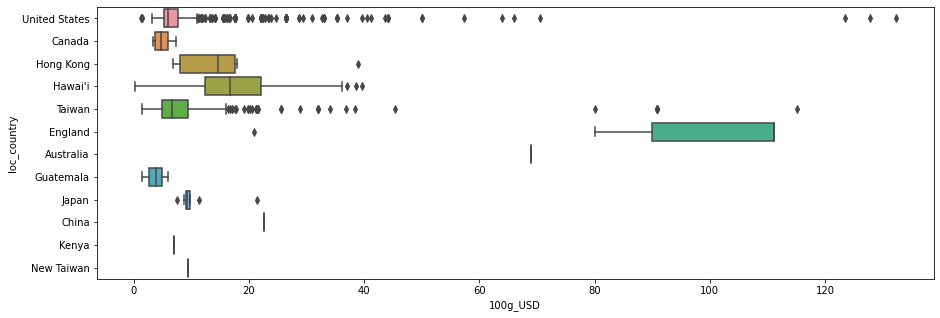

In [70]:
plt.figure(figsize=(15, 5))
sns.boxplot(x = '100g_USD', y='loc_country',data= df)

We can see a lot of outliers in USA and Taivan. Thats why I will use median, because median is less sensitive to outliers and is a better measure of central tendency in datasets with extreme values.

In [95]:
top_10 = df[df['loc_country']=='United States'].groupby(['name'])[['100g_USD']].median().nlargest(10,'100g_USD').reset_index()

In [97]:
plt.style.use('seaborn-pastel')

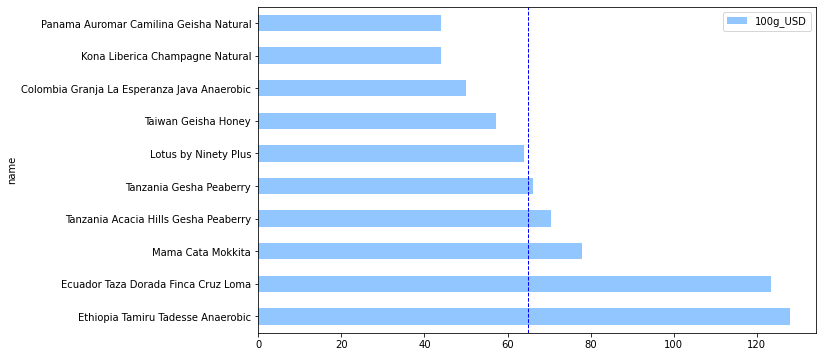

In [103]:
fig, ax = plt.subplots(figsize=(10, 6))
top_10.plot(kind='barh', y="100g_USD", x="name", ax=ax)
avg = top_10['100g_USD'].median()
ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)


In [12]:
countries =['England','Australia']
df[df['loc_country'].isin(countries)][['name','loc_country','origin','100g_USD']].sort_values('100g_USD', ascending= False)


,name,loc_country,origin,100g_USD
132,Esmeralda Estate Panama Geisha,England,Panama,111.11
480,Esmeralda Estate Panama Geisha,England,Panama,111.11
826,Esmeralda Estate Panama Geisha,England,Panama,111.11
1131,Esmeralda Estate Panama Geisha,England,Panama,111.11
606,Esmeralda Estate Panama Geisha,England,Panama,100.00
965,Hacienda La Esmeralda Montañas 71AS,England,Panama,80.00
351,Panama Hacienda La Esmeralda Super Mario Geisha,Australia,Panama,69.00
888,Bait Alal Community,England,Yemen,20.83


 What the roasteries in England and Australia have in common, apart from the high prices, is the variety of the coffee they offer: Geisha.